In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [79]:
def otuso_thresh(img):
    hist = cv.calcHist([img],[0],None,[256],[0,256]) 
    hist_norm = hist.ravel()/hist.sum() 
    Q = hist_norm.cumsum() 
    bins = np.arange(256) 
    fn_min = np.inf 
    thresh = -1 
    for i in range(1,256): 
        p1,p2 = np.hsplit(hist_norm,[i]) 
        q1,q2 = Q[i],Q[255]-Q[i] 
        if q1 < 1.e-6 or q2 < 1.e-6: 
            continue 
            
        b1,b2 = np.hsplit(bins,[i]) 

        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2 
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2 

        fn = v1*q1 + v2*q2 
        if fn < fn_min: 
            fn_min = fn 
            thresh = i
    print('Threshold value found using Otsu algorithm : '+ str( thresh))
    return thresh

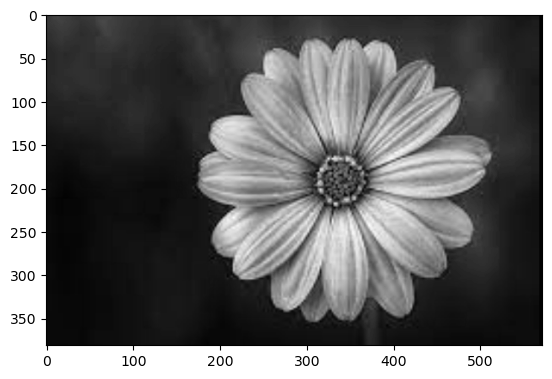

In [80]:
image = cv.imread('sc.png')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
img=np.copy(image)
plt.imshow(img, cmap = 'gray')

In [81]:
x= otuso_thresh(image)

Threshold value found using Otsu algorithm : 91


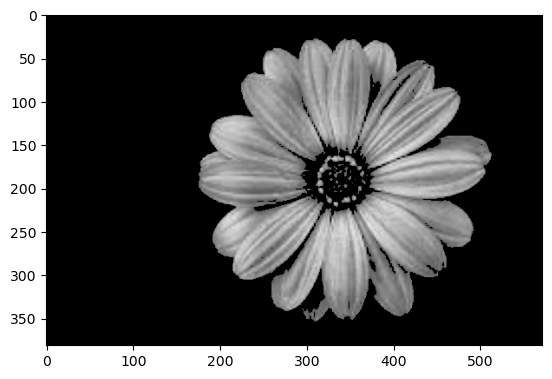

In [82]:
black=np.where((img[:,:,]<=x))
img[black]=(0)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

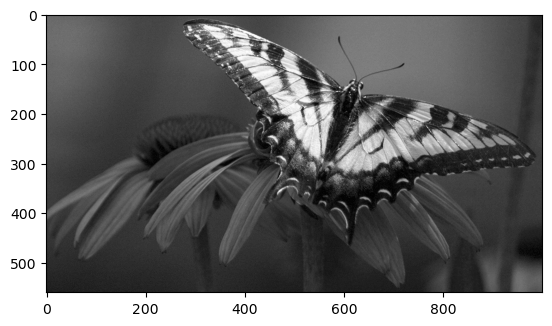

In [83]:
image_1 = cv.imread('image-one.jpg')
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
plt.imshow(image_1,cmap = 'gray')
img=np.copy(image_1)

In [84]:
x= otuso_thresh(image_1)

Threshold value found using Otsu algorithm : 100


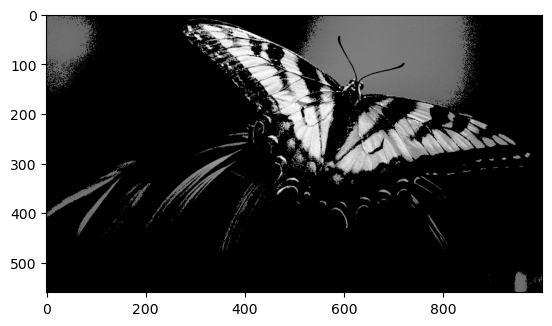

In [85]:
black=np.where((img[:,:]<=x))
img[black]=(0)
# img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')